# TRABAJO PRÁCTICO 2

In [1080]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [1081]:
data=pd.read_csv('./properatti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

# Limpieza de dataset

In [1082]:
#Nos quedamos únicamente con las propiedades de CABA

capital_federal_mask = data.state_name=="Capital Federal"
capital_federal = data[capital_federal_mask]
capital_federal

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...


In [1083]:
capital_federal_dos = capital_federal.loc[:,('property_type','place_name','surface_total_in_m2','surface_covered_in_m2', 'price')]
capital_federal_dos

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price
0,PH,Mataderos,55.0,40.0,62000.0
2,apartment,Mataderos,55.0,55.0,72000.0
3,PH,Liniers,NaN,NaN,95000.0
7,apartment,Belgrano,45.0,40.0,138000.0
8,apartment,Belgrano,65.0,60.0,195000.0
...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0
121209,apartment,Belgrano,157.0,NaN,410000.0
121215,apartment,Belgrano,113.0,93.0,870000.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0


In [1084]:
#Nos quedamos únicamente con los departamentos de CABA

capital_federal_apartment_mask = capital_federal.property_type=='apartment'
capital_federal_apartment = capital_federal_dos[capital_federal_apartment_mask]
capital_federal_apartment

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price
2,apartment,Mataderos,55.0,55.0,72000.0
7,apartment,Belgrano,45.0,40.0,138000.0
8,apartment,Belgrano,65.0,60.0,195000.0
13,apartment,Palermo Soho,50.0,30.0,111700.0
14,apartment,Palermo Soho,42.0,31.0,147900.0
...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0
121209,apartment,Belgrano,157.0,NaN,410000.0
121215,apartment,Belgrano,113.0,93.0,870000.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0


In [1085]:
#Porcentaje de nulls respecto al total del dataset por columna

percent_missing = capital_federal_apartment.isnull().sum() * 100 / len(capital_federal_apartment)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
surface_total_in_m2,surface_total_in_m2,16.484817
price,price,10.663165
surface_covered_in_m2,surface_covered_in_m2,6.646447
property_type,property_type,0.000000
place_name,place_name,0.000000


In [1086]:
capital_federal_apartment.surface_total_in_m2.fillna(capital_federal_apartment.surface_covered_in_m2, inplace=True)


/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/1765627769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.surface_total_in_m2.fillna(capital_federal_apartment.surface_covered_in_m2, inplace=True)


[(0.0, 500.0)]

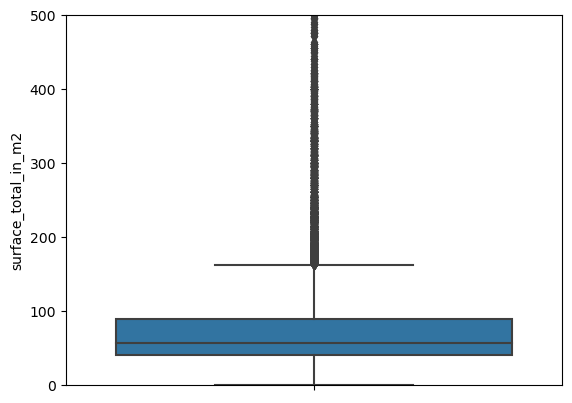

In [1087]:
#Búsqueda de outliers en la variable surface_total_in_m2

g=sns.boxplot(data=capital_federal_apartment,y='surface_total_in_m2')

g.set(ylim=(0,500))

In [1088]:
indice=capital_federal_apartment[capital_federal_apartment['surface_total_in_m2'] > 500]

indice.index


Int64Index([  1276,   5907,   6508,   6676,   7100,   8413,  13037,  13065,
             14022,  14859,  17288,  24159,  24379,  24384,  24548,  28563,
             31184,  34696,  34702,  45122,  45486,  46392,  46709,  46948,
             47109,  47399,  51824,  51995,  52788,  52789,  53048,  53116,
             53896,  54806,  55316,  56484,  57173,  57469,  58045,  58175,
             61820,  62863,  63093,  64104,  64643,  64645,  69472,  71875,
             71887,  73029,  73511,  76012,  76891,  78877,  88136,  88562,
             89003,  95810,  96392,  96438,  96778,  96836, 106459, 109632,
            109722, 109840, 114174, 117183, 118206],
           dtype='int64')

In [1089]:
#Los borramos

capital_federal_apartment.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/3335336408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.drop(indice.index, axis=0, inplace=True)


,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price
2,apartment,Mataderos,55.0,55.0,72000.0
7,apartment,Belgrano,45.0,40.0,138000.0
8,apartment,Belgrano,65.0,60.0,195000.0
13,apartment,Palermo Soho,50.0,30.0,111700.0
14,apartment,Palermo Soho,42.0,31.0,147900.0
...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0
121209,apartment,Belgrano,157.0,NaN,410000.0
121215,apartment,Belgrano,113.0,93.0,870000.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0


[(0.0, 550.0)]

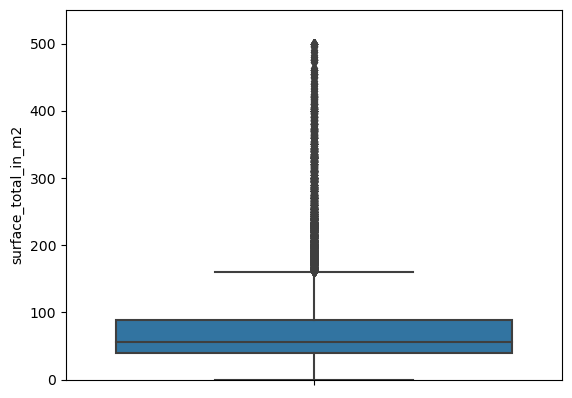

In [1090]:
#Chequeamos que se hayan borrado correctamente

g=sns.boxplot(data=capital_federal_apartment,y='surface_total_in_m2')

g.set(ylim=(0,550))

In [1091]:
capital_federal_apartment['surface_uncovered_in_m2'] = capital_federal_apartment.surface_total_in_m2 - capital_federal_apartment.surface_covered_in_m2
capital_federal_apartment

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/2375529020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment['surface_uncovered_in_m2'] = capital_federal_apartment.surface_total_in_m2 - capital_federal_apartment.surface_covered_in_m2


,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price,surface_uncovered_in_m2
2,apartment,Mataderos,55.0,55.0,72000.0,0.0
7,apartment,Belgrano,45.0,40.0,138000.0,5.0
8,apartment,Belgrano,65.0,60.0,195000.0,5.0
13,apartment,Palermo Soho,50.0,30.0,111700.0,20.0
14,apartment,Palermo Soho,42.0,31.0,147900.0,11.0
...,...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,410000.0,NaN
121209,apartment,Belgrano,157.0,NaN,410000.0,NaN
121215,apartment,Belgrano,113.0,93.0,870000.0,20.0
121217,apartment,Villa Urquiza,46.0,39.0,131500.0,7.0


In [1092]:
capital_federal_apartment.drop('surface_total_in_m2', axis=1, inplace=True)


/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/86561127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment.drop('surface_total_in_m2', axis=1, inplace=True)


In [1093]:
percent_missing = capital_federal_apartment.isnull().sum() * 100 / len(capital_federal_apartment)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
price,price,10.660783
surface_covered_in_m2,surface_covered_in_m2,6.641204
surface_uncovered_in_m2,surface_uncovered_in_m2,6.641204
property_type,property_type,0.000000
place_name,place_name,0.000000


In [1094]:
capital_federal_apartment_clean = capital_federal_apartment.dropna()
capital_federal_apartment_clean

,property_type,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,apartment,Mataderos,55.0,72000.0,0.0
7,apartment,Belgrano,40.0,138000.0,5.0
8,apartment,Belgrano,60.0,195000.0,5.0
13,apartment,Palermo Soho,30.0,111700.0,20.0
14,apartment,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...,...
121157,apartment,Belgrano,35.0,128000.0,3.0
121158,apartment,Recoleta,39.0,165000.0,5.0
121215,apartment,Belgrano,93.0,870000.0,20.0
121217,apartment,Villa Urquiza,39.0,131500.0,7.0


In [1095]:
percent_missing = capital_federal_apartment_clean.isnull().sum() * 100 / len(capital_federal_apartment_clean)
missing_value_df = pd.DataFrame({'column_name': capital_federal_apartment_clean.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
property_type,property_type,0.0
place_name,place_name,0.0
surface_covered_in_m2,surface_covered_in_m2,0.0
price,price,0.0
surface_uncovered_in_m2,surface_uncovered_in_m2,0.0


In [1096]:
capital_federal_apartment_clean.drop('property_type', inplace=True, axis=1)
capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/1491378632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop('property_type', inplace=True, axis=1)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121215,Belgrano,93.0,870000.0,20.0
121217,Villa Urquiza,39.0,131500.0,7.0


[(100.0, 1000000.0)]

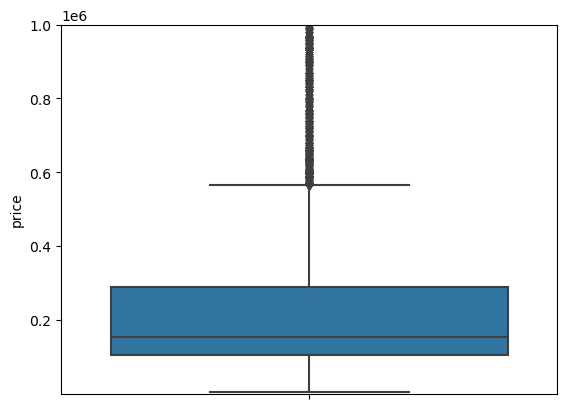

In [1097]:
#Búsqueda de putliers en la variable price

g=sns.boxplot(data=capital_federal_apartment_clean,y="price")

g.set(ylim=(100,1000000))

In [1098]:
indice=capital_federal_apartment_clean[capital_federal_apartment_clean['price'] > 800000]

indice.index

Int64Index([   219,    252,    351,    352,    353,    354,    355,    356,
               357,    358,
            ...
            120420, 120421, 120422, 120423, 120424, 120425, 120426, 120427,
            120428, 121215],
           dtype='int64', length=2060)

In [1099]:
capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/134126192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121153,Barrio Norte,65.0,165000.0,26.0
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121217,Villa Urquiza,39.0,131500.0,7.0


[(100.0, 1000000.0)]

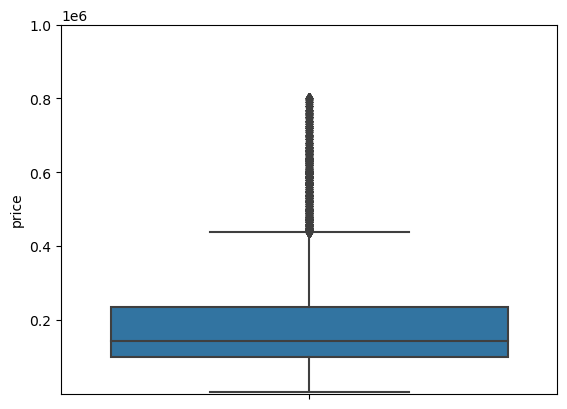

In [1100]:
#chequeo que las hayamos borrado correctamente

g=sns.boxplot(data=capital_federal_apartment_clean,y="price")

g.set(ylim=(100,1000000))

In [1101]:
#Chequeamos cantidad de propiedades por barrio

grouped = capital_federal_apartment_clean.groupby('place_name')

for nombre, frame in grouped:
    cantidad = len(frame)
    #if cantidad < 50
    print(f"El barrio {nombre} tiene {cantidad} propiedades")

El barrio Abasto tiene 72 propiedades
El barrio Agronomía tiene 26 propiedades
El barrio Almagro tiene 798 propiedades
El barrio Balvanera tiene 513 propiedades
El barrio Barracas tiene 280 propiedades
El barrio Barrio Norte tiene 831 propiedades
El barrio Belgrano tiene 1956 propiedades
El barrio Boca tiene 121 propiedades
El barrio Boedo tiene 687 propiedades
El barrio Caballito tiene 1818 propiedades
El barrio Capital Federal tiene 355 propiedades
El barrio Catalinas tiene 1 propiedades
El barrio Centro / Microcentro tiene 153 propiedades
El barrio Chacarita tiene 168 propiedades
El barrio Coghlan tiene 197 propiedades
El barrio Colegiales tiene 248 propiedades
El barrio Congreso tiene 250 propiedades
El barrio Constitución tiene 157 propiedades
El barrio Flores tiene 934 propiedades
El barrio Floresta tiene 259 propiedades
El barrio Las Cañitas tiene 115 propiedades
El barrio Liniers tiene 134 propiedades
El barrio Mataderos tiene 115 propiedades
El barrio Monserrat tiene 411 propi

### Limpio los datos de los barrios que tienen menos de 50 propiedades porque no se podrá predecir correctamente con tan pocas

In [1102]:
indice=capital_federal_apartment_clean[(capital_federal_apartment_clean['place_name'] == 'Agronomía')|
(capital_federal_apartment_clean['place_name'] == 'Catalinas' )|
(capital_federal_apartment_clean['place_name'] == 'Monte Castro' )|
(capital_federal_apartment_clean['place_name'] == 'Palermo Viejo')|
(capital_federal_apartment_clean['place_name'] == 'Parque Avellaneda')|
(capital_federal_apartment_clean['place_name'] == 'Parque Chas')|
(capital_federal_apartment_clean['place_name'] == 'Pompeya')|
(capital_federal_apartment_clean['place_name'] == 'Velez Sarsfield')|
(capital_federal_apartment_clean['place_name'] == 'Versalles')|
(capital_federal_apartment_clean['place_name'] == 'Villa General Mitre')|
(capital_federal_apartment_clean['place_name'] == 'Villa Real')|
(capital_federal_apartment_clean['place_name'] == 'Villa Riachuelo')|
(capital_federal_apartment_clean['place_name'] == 'Villa Santa Rita')|
(capital_federal_apartment_clean['place_name'] == 'Villa Soldati')]


In [1103]:
capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)

capital_federal_apartment_clean

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_4266/134126192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_federal_apartment_clean.drop(indice.index, axis=0, inplace=True)


,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
2,Mataderos,55.0,72000.0,0.0
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
13,Palermo Soho,30.0,111700.0,20.0
14,Palermo Soho,31.0,147900.0,11.0
...,...,...,...,...
121153,Barrio Norte,65.0,165000.0,26.0
121157,Belgrano,35.0,128000.0,3.0
121158,Recoleta,39.0,165000.0,5.0
121217,Villa Urquiza,39.0,131500.0,7.0


In [1104]:
grouped = capital_federal_apartment_clean.groupby('place_name')

for nombre, frame in grouped:
    cantidad = len(frame)
    #if cantidad < 50:
    print(f"El barrio {nombre} tiene {cantidad} propiedades")

El barrio Abasto tiene 72 propiedades
El barrio Almagro tiene 798 propiedades
El barrio Balvanera tiene 513 propiedades
El barrio Barracas tiene 280 propiedades
El barrio Barrio Norte tiene 831 propiedades
El barrio Belgrano tiene 1956 propiedades
El barrio Boca tiene 121 propiedades
El barrio Boedo tiene 687 propiedades
El barrio Caballito tiene 1818 propiedades
El barrio Capital Federal tiene 355 propiedades
El barrio Centro / Microcentro tiene 153 propiedades
El barrio Chacarita tiene 168 propiedades
El barrio Coghlan tiene 197 propiedades
El barrio Colegiales tiene 248 propiedades
El barrio Congreso tiene 250 propiedades
El barrio Constitución tiene 157 propiedades
El barrio Flores tiene 934 propiedades
El barrio Floresta tiene 259 propiedades
El barrio Las Cañitas tiene 115 propiedades
El barrio Liniers tiene 134 propiedades
El barrio Mataderos tiene 115 propiedades
El barrio Monserrat tiene 411 propiedades
El barrio Nuñez tiene 529 propiedades
El barrio Once tiene 117 propiedades

In [1105]:
#creamos las columnas dummies de barrios para poder correrlo el modelo

dummies = pd.get_dummies(capital_federal_apartment_clean['place_name']).rename(columns=lambda x: 'Barrio_' + str(x))
dummies

# X = pd.concat([dummies, std_df], axis = 1)

,Barrio_Abasto,Barrio_Almagro,Barrio_Balvanera,Barrio_Barracas,Barrio_Barrio Norte,Barrio_Belgrano,Barrio_Boca,Barrio_Boedo,Barrio_Caballito,Barrio_Capital Federal,...,Barrio_San Telmo,Barrio_Tribunales,Barrio_Villa Crespo,Barrio_Villa Devoto,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Urquiza,Barrio_Villa del Parque
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Modelo de regresión lineal múltiple

In [1106]:
#Estandarización de variables numéricas

numericals = ['surface_uncovered_in_m2', 'surface_covered_in_m2']

X = capital_federal_apartment_clean[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data, index=capital_federal_apartment_clean.index)
std_df.columns = [i + '_std' for i in numericals]

std_df
#data_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


,surface_uncovered_in_m2_std,surface_covered_in_m2_std
2,-0.242631,-0.190285
7,-0.073564,-0.495900
8,-0.073564,-0.088413
13,0.433637,-0.699643
14,0.129316,-0.679268
...,...,...
121153,0.636517,0.013458
121157,-0.141191,-0.597771
121158,-0.073564,-0.516274
121217,-0.005938,-0.516274


In [1107]:
X = pd.concat([dummies, std_df], axis = 1)
X

,Barrio_Abasto,Barrio_Almagro,Barrio_Balvanera,Barrio_Barracas,Barrio_Barrio Norte,Barrio_Belgrano,Barrio_Boca,Barrio_Boedo,Barrio_Caballito,Barrio_Capital Federal,...,Barrio_Villa Crespo,Barrio_Villa Devoto,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Urquiza,Barrio_Villa del Parque,surface_uncovered_in_m2_std,surface_covered_in_m2_std
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.242631,-0.190285
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.495900
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.088413
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.433637,-0.699643
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.129316,-0.679268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.636517,0.013458
121157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.141191,-0.597771
121158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073564,-0.516274
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-0.005938,-0.516274


In [1108]:
#Variable que buscamos predecir

y = capital_federal_apartment_clean.price

In [1109]:
#Separamos los conjuntos train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)


In [1110]:
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

print(model.coef_)

print(model.intercept_)


[-6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16 -6.12740926e+16
  3.03075000e+04  1.09743000e+05]
6.127409262521015e+16


In [1111]:
print("R2: ", model.score(X_train, y_train))

n = len(y_train)
p = 5
ypred_train = model.predict(X_train)
r2 = metrics.r2_score(y_train, ypred_train)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(y_train, ypred_train))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ypred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, ypred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ypred_train)))

R2:  0.6468155417628316
R2:  0.6468155417628316
R2 ajustado:  0.646692429500479
Mean Absolute Error: 50779.60543554007
Mean Squared Error: 7753121364.947456
Root Mean Squared Error: 88051.81068522927


In [1112]:
print("R2: ", model.score(X_test, y_test))

n = len(y_test)
p = 5
ypred_test = model.predict(X_test)
r2 = metrics.r2_score(y_test, ypred_test)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(y_test, ypred_test))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred_test)))

R2:  0.46367308637023474
R2:  0.46367308637023474
R2 ajustado:  0.4632366934380706
Mean Absolute Error: 53594.79726873679
Mean Squared Error: 11629860833.359453
Root Mean Squared Error: 107841.83248331536


### Podríamos volver atrás para aplicar más featrure enginieering a los datos que metemos al modelos, ya sea refinando las variables elegidas o elegiendo o agregando otras. Ya que en test el R2 nos da una valor muy bajo de predicción de un 0.46.

## Regularización

## Rigde

In [1113]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [1114]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 4, 5, 610.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

1.5
[-27907.83453476 -16096.98088098 -54618.35680478 -38946.38729741
  38014.0774542   40582.36077967 -38447.29654861 209196.24996845
  -6068.83436655 -11060.06928309 -28648.79621672 -23706.94526708
  -5635.70114256   -705.04331384 -51251.37691346 -64600.67315031
 -35706.44805057 -50047.31078184  89531.71062405 -36963.64181777
 -47306.4846286  -41215.26433241  32222.60144623 -59407.00612708
  58439.30724924 160968.70294851  42299.77071939  35025.50727161
 -17100.90439236 -34493.08593773 -34627.44060849 -45341.12032489
 258390.35090937  67103.46932074  11404.43812347  -6470.05733228
  49927.44295392 -54330.78642995 -24975.49094466 -41573.06898444
  -9130.95846678 -11793.79575471 -97748.59501521 -20439.00174334
 -13647.10605283 -23802.77056196  -4705.1820518  -14586.17370899
  30300.37439408 109661.07822981]
180156.27520330614


## Lasso

In [1115]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 7, 8, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

6.0
[-10925.71000893      0.         -38372.49824684 -22573.12198212
  54199.81196693  56798.16368432 -21864.86405629 225917.32496013
  10091.17409983   4781.79495534 -11997.86619748  -7064.21583452
   9948.47115638  15024.34131511 -34960.54581808 -48463.90455454
 -19421.76696284 -33754.73489848 106376.45722035 -20393.3903429
 -30858.8084593  -24901.10479506  48356.98301644 -43211.39592755
  74675.32684967 179277.31308946  58448.03600395  51081.80097789
     -0.         -17512.02476416 -18114.84287193 -28771.83511515
 276135.04813238  83359.91316279  26946.85023769   9423.13308351
  66113.26271359 -38048.62156306  -8645.21415923 -24785.79161983
   6947.73033981   3771.08095807 -82487.98089596  -3867.39127205
    318.41510172  -6768.97427799  11396.72797887   1178.57211705
  30308.76557528 109654.6465525 ]
163921.38269705264


### Resumen 3 modelos aplicados:

In [1116]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {metrics.r2_score(y_train, ypred_train)} y en test es {metrics.r2_score(y_test, ypred_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train, y_train)} y en test es {model_ridge_cv.score(X_test, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train, y_train)} y en test es {model_lasso_cv.score(X_test, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 0.6468155417628316 y en test es 0.46367308637023474


Modelo Ridge:

Score (R^2) en train del modelo es 0.6468176389475626 y en test es 0.46413146357925394


Modelo Lasso:

Score (R^2) en train del modelo es 0.6468193545573746 y en test es 0.4641759473214945




In [1117]:
metrica = mean_squared_error

print ('Modelo OLS:\n')
print (f'Score (MSE) en train del modelo es {metrics.mean_squared_error(y_train, ypred_train)} y en test es {metrics.mean_squared_error(y_test, ypred_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_ridge_cv.predict(X_train))} y en test es {metrica(y_test, model_ridge_cv.predict(X_test))}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_lasso_cv.predict(X_train))} y en test es {metrica(y_test, model_lasso_cv.predict(X_test))}')
print ('\n')

Modelo OLS:

Score (MSE) en train del modelo es 7753121364.947456 y en test es 11629860833.359453


Modelo Ridge:

Score (MSE) en train del modelo es 7753075327.452417 y en test es 11619921255.43673


Modelo Lasso:

Score (MSE) en train del modelo es 7753037666.307432 y en test es 11618956657.69148




## Otro modelo - barrios top 3

Vamos a quedarnos con el top 3 de barrios con mayor cantidad de propiedades y aremos un modelos para los mismos:

In [1118]:
#Chequeamos cantidad de propiedades por barrio, para elegir el top 3

grouped = capital_federal_apartment_clean.groupby('place_name')

for nombre, frame in grouped:
    cantidad = len(frame)
    if cantidad > 1000:
        print(f"El barrio {nombre} tiene {cantidad} propiedades")

El barrio Belgrano tiene 1956 propiedades
El barrio Caballito tiene 1818 propiedades
El barrio Palermo tiene 1912 propiedades
El barrio Recoleta tiene 1128 propiedades
El barrio Villa Urquiza tiene 1031 propiedades


In [1119]:
indice=capital_federal_apartment_clean[(capital_federal_apartment_clean['place_name'] == 'Belgrano')|
(capital_federal_apartment_clean['place_name'] == 'Caballito' )|
(capital_federal_apartment_clean['place_name'] == 'Palermo' )]

top_3 = capital_federal_apartment_clean.loc[indice.index]
top_3.head(5)

,place_name,surface_covered_in_m2,price,surface_uncovered_in_m2
7,Belgrano,40.0,138000.0,5.0
8,Belgrano,60.0,195000.0,5.0
19,Palermo,96.0,350000.0,8.0
21,Palermo,73.0,270500.0,45.0
52,Caballito,50.0,110000.0,0.0


In [1120]:
dummies = pd.get_dummies(top_3['place_name']).rename(columns=lambda x: 'Barrio_' + str(x))
dummies

,Barrio_Belgrano,Barrio_Caballito,Barrio_Palermo
7,1,0,0
8,1,0,0
19,0,0,1
21,0,0,1
52,0,1,0
...,...,...,...
121113,0,0,1
121128,1,0,0
121146,0,0,1
121152,0,1,0


In [1121]:
#Estandarización de variables numéricas

numericals = ['surface_uncovered_in_m2', 'surface_covered_in_m2']

X = top_3[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data, index=top_3.index)
std_df.columns = [i + '_std' for i in numericals]

std_df

,surface_uncovered_in_m2_std,surface_covered_in_m2_std
7,-0.200542,-0.652842
8,-0.200542,-0.195323
19,-0.011336,0.628212
21,2.322202,0.102065
52,-0.515885,-0.424082
...,...,...
121113,0.240938,0.445204
121128,-0.515885,0.582460
121146,-0.011336,0.422328
121152,-0.515885,-0.812973


In [1122]:
X = pd.concat([dummies, std_df], axis = 1)
X

,Barrio_Belgrano,Barrio_Caballito,Barrio_Palermo,surface_uncovered_in_m2_std,surface_covered_in_m2_std
7,1,0,0,-0.200542,-0.652842
8,1,0,0,-0.200542,-0.195323
19,0,0,1,-0.011336,0.628212
21,0,0,1,2.322202,0.102065
52,0,1,0,-0.515885,-0.424082
...,...,...,...,...,...
121113,0,0,1,0.240938,0.445204
121128,1,0,0,-0.515885,0.582460
121146,0,0,1,-0.011336,0.422328
121152,0,1,0,-0.515885,-0.812973


In [1123]:

y = top_3.price

In [1124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

In [1125]:
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

print(model.coef_)

print(model.intercept_)

[-7.15046472e+17 -7.15046472e+17 -7.15046472e+17  2.17360000e+04
  1.16448000e+05]
7.15046471616285e+17


In [1126]:
print("R2: ", model.score(X_train, y_train))

n = len(y_train)
p = 5
ypred_train = model.predict(X_train)
r2 = metrics.r2_score(y_train, ypred_train)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(y_train, ypred_train))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ypred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, ypred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ypred_train)))

R2:  0.7290135403361484
R2:  0.7290135403361484
R2 ajustado:  0.7286725910914782
Mean Absolute Error: 46270.56030150754
Mean Squared Error: 5864292473.653769
Root Mean Squared Error: 76578.66852886493


In [1127]:
print("R2: ", model.score(X_test, y_test))

n = len(y_test)
p = 5
ypred_test = model.predict(X_test)
r2 = metrics.r2_score(y_test, ypred_test)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(y_test, ypred_test))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred_test)))

R2:  0.6988054769561236
R2:  0.6988054769561236
R2 ajustado:  0.6979196107118769
Mean Absolute Error: 48622.099648300114
Mean Squared Error: 6801060089.461899
Root Mean Squared Error: 82468.53999836482


In [1128]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 4, 5, 10, 12, 22, 26], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)


22.0
[  6659.05954125 -31831.27313199  25172.21359073  21813.80959737
 115915.14744351]
220860.50911299084


In [1129]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

100.0
[    -0.         -38698.14310662  18561.83110687  21716.40953725
 116479.5426106 ]
227578.65894133496


In [1130]:
print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {metrics.r2_score(y_train, ypred_train)} y en test es {metrics.r2_score(y_test, ypred_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train, y_train)} y en test es {model_ridge_cv.score(X_test, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train, y_train)} y en test es {model_lasso_cv.score(X_test, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 0.7290135403361484 y en test es 0.6988054769561236


Modelo Ridge:

Score (R^2) en train del modelo es 0.7290342001565646 y en test es 0.6991145894691111


Modelo Lasso:

Score (R^2) en train del modelo es 0.7290557148588506 y en test es 0.698891987568219




In [1131]:
metrica = mean_squared_error

print ('Modelo OLS:\n')
print (f'Score (MSE) en train del modelo es {metrics.mean_squared_error(y_train, ypred_train)} y en test es {metrics.mean_squared_error(y_test, ypred_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_ridge_cv.predict(X_train))} y en test es {metrica(y_test, model_ridge_cv.predict(X_test))}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_lasso_cv.predict(X_train))} y en test es {metrica(y_test, model_lasso_cv.predict(X_test))}')
print ('\n')

Modelo OLS:

Score (MSE) en train del modelo es 5864292473.653769 y en test es 6801060089.461899


Modelo Ridge:

Score (MSE) en train del modelo es 5863845384.048168 y en test es 6794080238.852444


Modelo Lasso:

Score (MSE) en train del modelo es 5863379794.339944 y en test es 6799106654.634164


